In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from surprise.model_selection import train_test_split, cross_validate
from surprise import SVD, Reader, Dataset

import numpy as np
from surprise import SVD, KNNBasic, Dataset, Reader
from surprise.model_selection import KFold
from surprise import accuracy
# Importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Librerías de Scikit-learn
from sklearn import datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [23]:
df = pd.read_csv("ratings_Electronics.csv",
                             names=['userId', 'productId','rating','timestamp'])
print(df.shape[0])

7824482


In [24]:
user_counts = df['userId'].value_counts()
product_counts = df['productId'].value_counts()
filtered_dataset = df[
    (df['userId'].isin(user_counts[user_counts >= 50].index)) &
    (df['productId'].isin(product_counts[product_counts >= 5].index))
]
filtered_dataset.shape

print("Total number of ratings :",filtered_dataset['rating'].nunique())
print("Total number of users   :", filtered_dataset['userId'].nunique())
print("Total number of products  :", filtered_dataset['productId'].nunique())
print(filtered_dataset['userId'].value_counts())


Total number of ratings : 5
Total number of users   : 1540
Total number of products  : 39939
userId
ADLVFFE4VBT8      468
A5JLAU2ARJ0BO     463
A3OXHLG6DIBRW8    456
A6FIAB28IS79      412
A680RUE1FDO8B     381
                 ... 
A1XEQGYY1IL8CD     34
AD8DLOGHAXL        34
A2NT3W1F1XYBFZ     33
A16CVJUQOB6GIB     31
A3MV1KKHX51FYT     20
Name: count, Length: 1540, dtype: int64


In [25]:
filtered_counts = filtered_dataset['userId'].value_counts()
filtered_counts = filtered_counts[filtered_counts >= 50]

                 userId   productId  rating   timestamp
118       AT09WGFUM934H  0594481813     3.0  1377907200
177      A32HSNCNPRUMTR  0970407998     1.0  1319673600
178      A17HMM1M7T9PJ1  0970407998     4.0  1281744000
492      A3CLWR1UUZT6TG  0972683275     5.0  1373587200
631      A3TAS1AG6FMBQW  0972683275     5.0  1353456000
...                 ...         ...     ...         ...
7824423  A34BZM6S9L7QI4  B00LGQ6HL8     5.0  1405555200
7824424  A1G650TTTHEAL5  B00LGQ6HL8     5.0  1405382400
7824425  A25C2M3QF9G7OQ  B00LGQ6HL8     5.0  1405555200
7824426   A1E1LEVQ9VQNK  B00LGQ6HL8     5.0  1405641600
7824427  A2NYK9KWFMJV4Y  B00LGQ6HL8     5.0  1405209600

[107263 rows x 4 columns]
userId
ADLVFFE4VBT8      468
A5JLAU2ARJ0BO     463
A3OXHLG6DIBRW8    456
A6FIAB28IS79      412
A680RUE1FDO8B     381
                 ... 
A1ZPUEHF4AES86     50
AR1T36GLLAFFX      50
AW6FQE5QRF2LM      50
A1FOSIV4TWZFR7     50
AN0JK8OQLUC55      50
Name: count, Length: 1320, dtype: int64
Total number

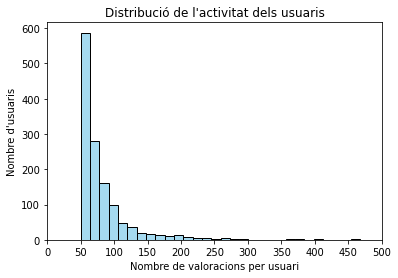

In [26]:
filtered_counts
# Obtener los IDs de usuarios que cumplen la condición
user_ids_of_interest = filtered_counts.index

# Filtrar el DataFrame original
filtered_dataset = filtered_dataset[filtered_dataset['userId'].isin(user_ids_of_interest)]
print(filtered_dataset)
print(filtered_dataset['userId'].value_counts())
user_activity = filtered_dataset.groupby('userId')['rating'].count()
print("Total number of ratings :",filtered_dataset['rating'].nunique())
print("Total number of users   :", filtered_dataset['userId'].nunique())
print("Total number of products  :", filtered_dataset['productId'].nunique())

sns.histplot(user_activity, kde=False, bins=30, color='skyblue')
plt.title("Distribució de l'activitat dels usuaris")
plt.xlabel("Nombre de valoracions per usuari")
plt.ylabel("Nombre d'usuaris")
plt.xticks(range(0, user_activity.max() + 50, 50))
plt.show()

In [27]:
#filtered_dataset Matriu filtrada dels usuaris. 
# 1. Matriu agafem aleatoriament 500 files.
unique_users = filtered_dataset['userId'].unique()

#Seleccionar aleatoriamente 500 usuarios (o menos si hay menos usuarios disponibles)
selected_users = np.random.choice(unique_users, size=min(1000, len(unique_users)), replace=False)

#Filtrar el DataFrame para mantener solo los usuarios seleccionados
dataset_1000 = filtered_dataset[filtered_dataset['userId'].isin(selected_users)]
dataset_1000.shape
print("Total number of users:", dataset_1000.userId.nunique())
dataset_1000.head

Total number of users: 1000


<bound method NDFrame.head of                  userId   productId  rating   timestamp
118       AT09WGFUM934H  0594481813     3.0  1377907200
177      A32HSNCNPRUMTR  0970407998     1.0  1319673600
178      A17HMM1M7T9PJ1  0970407998     4.0  1281744000
492      A3CLWR1UUZT6TG  0972683275     5.0  1373587200
631      A3TAS1AG6FMBQW  0972683275     5.0  1353456000
...                 ...         ...     ...         ...
7824216  A3A4ZAIBQWKOZS  B00L3YHF6O     5.0  1404691200
7824241   AY6A8KPYCE6B0  B00L403O94     5.0  1405900800
7824342    AA95DWUI3ODU  B00L8QCVL6     5.0  1405987200
7824424  A1G650TTTHEAL5  B00LGQ6HL8     5.0  1405382400
7824425  A25C2M3QF9G7OQ  B00LGQ6HL8     5.0  1405555200

[82573 rows x 4 columns]>

In [28]:
reader = Reader()
data = Dataset.load_from_df(dataset_1000[['userId', 'productId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

svd = SVD()
svd.fit(trainset)
pred = svd.test(testset)

In [ ]:
#Distancia cosinus
sim_options_cosinus = {'name': 'cosine', 'user_based': True}
#Distancia pearson 
sim_options_pearson = {'name': 'pearson', 'user_based': True}
#Distancia cosinus
sim_options_cosinus_items = {'name': 'cosine', 'user_based': False}
#Distancia pearson 
sim_options_pearson_items = {'name': 'pearson', 'user_based': False}

In [ ]:
#Model cosinus
model_cosinus = KNNBasic(sim_options=sim_options_cosinus)
model_cosinus_item = KNNBasic(k = 10, sim_options=sim_options_cosinus_items)
# Realizar validación cruzada con 5 particiones
#results_cosine = cross_validate(model_cosinus, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

start_time = time.time()
model_cosinus.fit(trainset)
predictions_cosinus_user = model_cosinus.test(testset)
execution_time_c_u = time.time() - start_time

# Evaluar el modelo en el testset (hacer predicciones)
start_time = time.time()
model_cosinus_item.fit(trainset)
predictions_cosinus_user_item = model_cosinus_item.test(testset)
execution_time_c_i = time.time() - start_time

In [29]:
k_values = list(range(1, 51))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'cosine', 'user_based': False}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('Item-Item dist cosinus: Evolución de RMSE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('Item-Item dist cosinus: Evolución de MAE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

Computing the cosine similarity matrix...


MemoryError: Unable to allocate 5.67 GiB for an array with shape (27582, 27582) and data type float64

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'pearson', 'user_based': False}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('Item-Item dist pearson: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('Item-Item dist pearson: Evolució de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'cosine', 'user_based': True}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist cosinus: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist cosinus: Evolución de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'pearson', 'user_based': True}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist pearson: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist pearson: Evolució de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluar el RMSE en las predicciones del testset
rmse_c_u = accuracy.rmse(predictions_cosinus_user)
print(f'RMSE en el testset: {rmse}')

# Evaluar el MAE en las predicciones del testset
mae_c_u = accuracy.mae(predictions_cosinus_user)
print(f'MAE en el testset: {mae}')

# Evaluar el RMSE en las predicciones del testset
rmse_c_i = accuracy.rmse(predictions_cosinus_user_item)
print(f'RMSE en el testset: {rmse}')

# Evaluar el MAE en las predicciones del testset
mae_c_i = accuracy.mae(predictions_cosinus_user_item)
print(f'MAE en el testset: {mae}')

##Visualización cosinus cual es mejor si item-item o user-user
import matplotlib.pyplot as plt

# Datos simulados de las métricas
models = ['User-User', 'Item-Item']
rmse_values = [rmse_c_u, rmse_c_i]  # RMSE para User-User y Item-Item
mae_values = [mae_c_u, mae_c_i]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('Comparació de RMSE entre User-User y Item-Item', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('Comparació de MAE entre User-User y Item-Item', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [ ]:
rmse_c_u = accuracy.rmse(predictions_cosinus_user)
mae_c_u = accuracy.mae(predictions_cosinus_user)

rmse_c_i = accuracy.rmse(predictions_cosinus_user_item)
mae_c_i = accuracy.mae(predictions_cosinus_user_item)

rmse_svd = accuracy.rmse(pred)
mae_svd = accuracy.mae(pred)

# Visualització de RMSE i MAE
models = ['User-User', 'Item-Item', 'SVD']
rmse_values = [rmse_c_u, rmse_c_i, rmse_svd]
mae_values = [mae_c_u, mae_c_i, mae_svd]

plt.figure(figsize=(12, 5))

# Gràfica de RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('Comparació de RMSE entre models', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gràfica de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.title('Comparació de MAE entre models', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Gràfica de temps d'execució
execution_times = [execution_time_c_u, execution_time_c_i, execution_time_svd]
plt.figure(figsize=(6, 5))
plt.bar(models, execution_times, color=['blue', 'green', 'red'])
plt.title('Temps d\'Execució entre Models', fontsize=14)
plt.ylabel('Temps (segons)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()